In [1]:
# 必要なライブラリをimportします
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# 可視化のためのセットです。
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Yahooからデータを読み込めるようにします
from pandas_datareader import DataReader

# Pythonで日付と時刻を扱うためのモジュールです
from datetime import datetime

/Users/fujiiryou/.pyenv/versions/3.7.4/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
# 所謂ハイテク企業の株価を扱ってみます。
tech_list = ['AAPL','GOOG','MSFT','AMZN']

# 直近1年間のデータを使ってみましょう。
end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)

# それぞれの企業ごとに、Yahooのサイトからデータを取得します
for stock in tech_list:   
    # それぞれの名前でDataFrameを作ります。
    globals()[stock] = DataReader(stock,'yahoo',start,end)

In [4]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2019-08-05 to 2020-08-04
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       253 non-null    float64
 1   Low        253 non-null    float64
 2   Open       253 non-null    float64
 3   Close      253 non-null    float64
 4   Volume     253 non-null    float64
 5   Adj Close  253 non-null    float64
dtypes: float64(6)
memory usage: 13.8 KB


In [5]:
AAPL.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [7]:
AAPL.isnull().any()

# 欠損値は入っていない

High         False
Low          False
Open         False
Close        False
Volume       False
Adj Close    False
dtype: bool

In [9]:
AAPL.head(1)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-08-05,198.649994,192.580002,197.990005,193.339996,52393000.0,191.059784


In [12]:
df_AAPL_high = AAPL['High'].reset_index()

# indexがdateになっている それがいいケースって何だろう？？

In [13]:
df_AAPL_high.head()

,Date,High
0,2019-08-05,198.649994
1,2019-08-06,198.070007
2,2019-08-07,199.559998
3,2019-08-08,203.529999
4,2019-08-09,202.759995


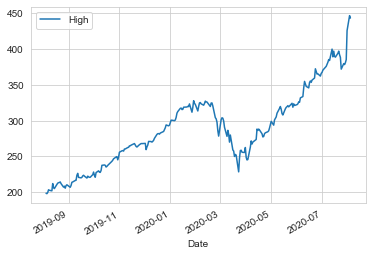

In [39]:
df_AAPL_high.plot(x='Date',y= 'High')
df_AAPL_high['Ma_200'] = df_AAPL_high['High'].rolling(window=30).mean()

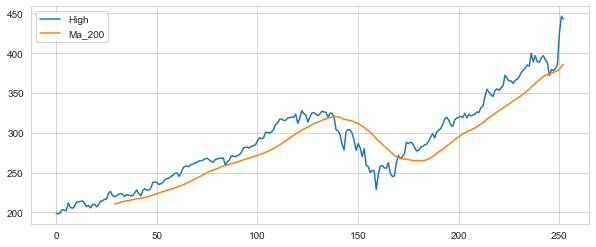

In [40]:
df_AAPL_high[['High','Ma_200']].plot(subplots=False,figsize=(10,4))

In [41]:
nfl_frame = pd.read_clipboard()

In [42]:
nfl_frame

,id,名前,恋愛マニア,デート日,フルチャン,積極性,マジック,狙ってた？,攻略度,Ｌ,...,アプリ経験,ステータス,独立心,学歴,顔面,モテ度,身長,体型,頭身,出会い
0,1,今井乃々,4.0,2020/07,4.0,3.0,1,9,3,D,...,5.0,7,65.0,5.0,154,普通,6.5,東カレ,NaN,NaN
1,2,ななこ,2.0,2020/07,3.0,4.0,1,7,5,D,...,2.0,6,67.0,5.0,164,痩せ型,7,東カレ,NaN,NaN
2,3,かほさん,2.0,2020/07,3.0,2.0,0,7,10,Ｌ,...,3.0,8,60.0,3.0,155,痩せ型,6.5,東カレ,NaN,NaN
3,4,おっぱい,2.0,2020/06,3.0,2.0,1,0,8,Ｌ,...,4.0,8,40.0,1.0,168,太り気味,6,東カレ,NaN,NaN
4,5,うさぎ,5.0,2020/06,3.0,3.0,0,0,9,Ｌ,...,3.0,6,48.0,1.0,157,病的な痩せ型,6,東カレ,NaN,NaN
5,6,丸紅,3.0,2020/03,4.5,3.0,2,9,5,D,...,2.0,5,67.0,5.0,154,普通,6.5,東カレ,NaN,NaN
6,7,ちえみ,2.0,2020/03,4.0,3.0,2,7,10,D,...,4.0,5,55.0,4.0,157,普通,6.3,東カレ,NaN,NaN
7,8,スケボー,5.0,2020/03,3.0,4.0,0,1,10,D,...,2.0,3,55.0,3.0,157,普通,6.3,東カレ,NaN,NaN
8,9,えみこ,3.0,2020/03,3.5,4.0,0,8,9,D,...,2.0,5,65.0,4.5,157,普通,6.3,東カレ,NaN,NaN
9,10,ちつね,4.0,2020/03,3.0,3.0,0,2,9,Ｌ,...,3.0,9,50.0,2.0,155,普通,6,東カレ,NaN,NaN
